In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0) # For reproducibility - Makes the random numbbers predictable

In [8]:
dogs_whisker_length=np.random.normal(loc=5,scale=1,size=10)
dogs_ear_flappiness_index=np.random.normal(loc=8,scale=1,size=10)

In [9]:
cats_whisker_length=np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_index=np.random.normal(loc=5,scale=1,size=10)

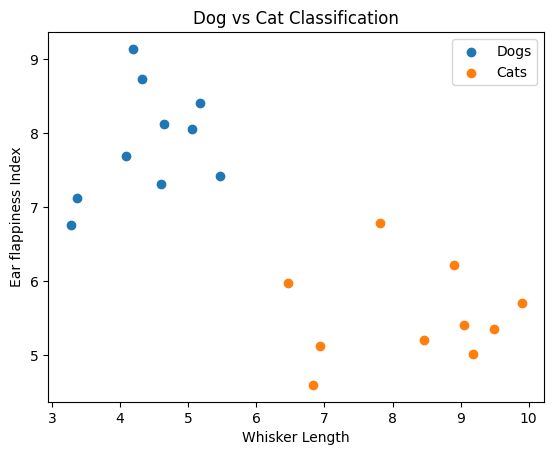

In [10]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index, label ='Dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness_index, label ='Cats')
plt.xlabel('Whisker Length')
plt.ylabel("Ear flappiness Index")
plt.title('Dog vs Cat Classification')
plt.legend()
plt.show()

In [15]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta,x_dog)+theta0 <=0:
            error+=1
    for x_cat in data_cats:
        if np.dot(theta,x_cat)+ theta0>0:
            error+=1
    return error

In [14]:
# Implementing random linear classifier
def random_linear_classifier(data_dogs, data_cats,k,d):
    # d is the number of features
    best_error = float('inf')
    best_theta= None
    best_theta0=None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0=np.random.normal()
        error = compute_error(data_dogs,data_cats,theta,theta0)

        if error< best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    return best_theta, best_theta0

In [11]:
dogs_data= np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data= np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T

In [12]:
dogs_data

array([[4.32753955, 8.72909056],
       [4.64044684, 8.12898291],
       [4.18685372, 9.13940068],
       [3.2737174 , 6.76517418],
       [5.17742614, 8.40234164],
       [4.59821906, 7.31518991],
       [3.36980165, 7.12920285],
       [5.46278226, 7.42115034],
       [4.09270164, 7.68844747],
       [5.0519454 , 8.05616534]])

In [16]:
k=100
d=2 # number of features
best_theta,best_theta0=random_linear_classifier(dogs_data,cats_data,k,d)

In [17]:
best_theta,best_theta0

(array([-2.77259276,  1.95591231]), 0.39009332268792646)

In [18]:
# Plot the decision boundary
x_vals=np.linspace(2,10,100)
y_vals=(-best_theta[0]/best_theta[1])* x_vals - (best_theta0/best_theta[1])

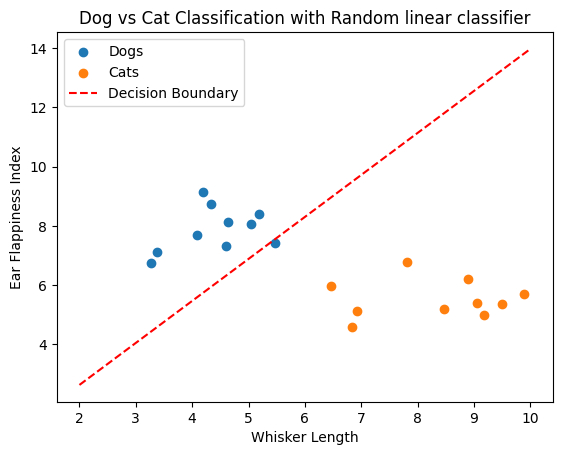

In [19]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label='Dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label='Cats')
plt.plot(x_vals,y_vals, color='red', linestyle='--', label = 'Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification with Random linear classifier')
plt.legend()
plt.show()